# Static Axially Symmetric Gravitational Fields by Voorheers
##  Geoff Cope
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  University of Utah
##  January 9, 2022

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.2.2119

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
eta,xi,phi,t,deta,dzeta,dphi,dt = symbols('eta xi phi t deta dzeta dphi dt')

In [4]:
gamma = Function('gamma')(eta,zeta)
gamma

In [5]:
nu = Function('nu')(eta,zeta)
nu

In [6]:
rho = Function('rho')(eta,zeta)
rho

In [8]:
variables = Matrix( [eta,zeta,phi,t] )
variables

⎡η⎤
⎢ ⎥
⎢ζ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣t⎦

In [9]:
differentials = Matrix( [deta,dzeta,dphi,dt] ) 
differentials

⎡deta ⎤
⎢     ⎥
⎢dzeta⎥
⎢     ⎥
⎢dphi ⎥
⎢     ⎥
⎣ dt  ⎦

In [10]:
lineElement = expand(  exp(-2*gamma) * ( exp(2*nu) * (deta**2 + dzeta**2) + rho**2 * dphi**2 ) - exp(2*gamma) * dt**2 ) 
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ -2⋅γ(η, ζ)  2⋅ν(η, ζ)                                                           ⎤
⎢ℯ          ⋅ℯ                     0                      0                 0     ⎥
⎢                                                                                 ⎥
⎢                         -2⋅γ(η, ζ)  2⋅ν(η, ζ)                                   ⎥
⎢          0             ℯ          ⋅ℯ                    0                 0     ⎥
⎢                                                                                 ⎥
⎢                                                 2        -2⋅γ(η, ζ)             ⎥
⎢          0                       0             ρ (η, ζ)⋅ℯ                 0     ⎥
⎢                                                                                 ⎥
⎢                                                                        2⋅γ(η, ζ)⎥
⎣          0                       0                      0            -ℯ         ⎦

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡ -2⋅γ(η, ζ)  2⋅ν(η, ζ)                                                           ⎤
⎢ℯ          ⋅ℯ                     0                      0                 0     ⎥
⎢                                                                                 ⎥
⎢                         -2⋅γ(η, ζ)  2⋅ν(η, ζ)                                   ⎥
⎢          0             ℯ          ⋅ℯ                    0                 0     ⎥
⎢                                                                                 ⎥
⎢                                                 2        -2⋅γ(η, ζ)             ⎥
⎢          0                       0             ρ (η, ζ)⋅ℯ                 0     ⎥
⎢                                                                                 ⎥
⎢                                                                        2⋅γ(η, ζ)⎥
⎣          0                       0                      0            -ℯ         ⎦

In [14]:
from einsteinpy.symbolic import *

In [15]:
syms = sympy.symbols("eta zeta phi t")
eta,zeta,phi,t = syms

In [16]:
metric = MetricTensor(m,syms)

In [17]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                                                                        
⎢⎡⎛     -2⋅γ(η, ζ)  2⋅ν(η, ζ) ∂                -2⋅γ(η, ζ)  2⋅ν(η, ζ) ∂          ⎞  2⋅γ(η, ζ)  -2⋅ν(η, ζ)  ⎛     -2⋅γ(η, ζ)  2⋅ν(η, ζ) ∂  
⎢⎢⎜- 2⋅ℯ          ⋅ℯ         ⋅──(γ(η, ζ)) + 2⋅ℯ          ⋅ℯ         ⋅──(ν(η, ζ))⎟⋅ℯ         ⋅ℯ            ⎜- 2⋅ℯ          ⋅ℯ         ⋅──(
⎢⎢⎝                           ∂η                                     ∂η         ⎠                         ⎝                           ∂ζ 
⎢⎢──────────────────────────────────────────────────────────────────────────────────────────────────────  ───────────────────────────────
⎢⎢                                                  2                                                                                    
⎢⎢                                                                                                                                       
⎢⎢⎛     -2⋅γ(η, ζ)  2⋅ν(η, ζ) ∂   

In [18]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                 ∂           ∂             ∂           ∂             ∂  
⎢                 2     2              2              2              2            ──(γ(η, ζ))⋅──(ρ(η, ζ))   ──(γ(η, ζ))⋅──(ρ(η, ζ))   ──(
⎢    ⎛∂          ⎞     ∂              ∂              ∂              ∂             ∂η          ∂η            ∂ζ          ∂ζ            ∂η 
⎢- 2⋅⎜──(γ(η, ζ))⎟  + ───(γ(η, ζ)) + ───(γ(η, ζ)) - ───(ν(η, ζ)) - ───(ν(η, ζ)) + ─────────────────────── + ─────────────────────── + ───
⎢    ⎝∂η         ⎠      2              2              2              2                    ρ(η, ζ)                   ρ(η, ζ)              
⎢                     ∂η          

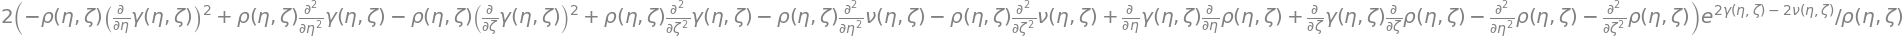

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛                       2             2                                 2             2                      2                      2 
⎢  ⎜          ⎛∂          ⎞             ∂                     ⎛∂          ⎞             ∂                      ∂                      ∂  
⎢  ⎜- ρ(η, ζ)⋅⎜──(γ(η, ζ))⎟  + ρ(η, ζ)⋅───(γ(η, ζ)) - ρ(η, ζ)⋅⎜──(γ(η, ζ))⎟  + ρ(η, ζ)⋅───(γ(η, ζ)) - ρ(η, ζ)⋅───(ν(η, ζ)) - ρ(η, ζ)⋅───(
⎢  ⎜          ⎝∂η         ⎠              2                    ⎝∂ζ         ⎠              2                      2                      2 
⎢  ⎝                                   ∂η                                              ∂ζ                     ∂η                     ∂ζ  
⎢- ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                                                                      ρ(
⎢                                 

In [21]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [22]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [23]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡    ⎛                       2                        2                                                         2         ⎞              
⎢    ⎜          ⎛∂          ⎞            ⎛∂          ⎞    ∂           ∂             ∂           ∂              ∂          ⎟              
⎢1.0⋅⎜- ρ(η, ζ)⋅⎜──(γ(η, ζ))⎟  + ρ(η, ζ)⋅⎜──(γ(η, ζ))⎟  + ──(ν(η, ζ))⋅──(ρ(η, ζ)) - ──(ν(η, ζ))⋅──(ρ(η, ζ)) + ───(ρ(η, ζ))⎟              
⎢    ⎜          ⎝∂η         ⎠            ⎝∂ζ         ⎠    ∂η          ∂η            ∂ζ          ∂ζ              2         ⎟          - 2⋅
⎢    ⎝                                                                                                        ∂ζ          ⎠              
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────          ────
⎢                                                         ρ(η, ζ)                                                                        
⎢                                 

In [24]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡⎛                 2     2              2              2              2         ⎞                                                        
⎢⎜    ⎛∂          ⎞     ∂              ∂              ∂              ∂          ⎟           ∂           ∂             ∂           ∂      
⎢⎜- 2⋅⎜──(γ(η, ζ))⎟  + ───(γ(η, ζ)) + ───(γ(η, ζ)) - ───(ν(η, ζ)) - ───(ν(η, ζ))⎟⋅ρ(η, ζ) + ──(γ(η, ζ))⋅──(ρ(η, ζ)) + ──(γ(η, ζ))⋅──(ρ(η,
⎢⎜    ⎝∂η         ⎠      2              2              2              2         ⎟           ∂η          ∂η            ∂ζ          ∂ζ     
⎢⎝                     ∂η             ∂ζ             ∂η             ∂ζ          ⎠                                                        
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                                    ρ(η, ζ)                             
⎢                                 

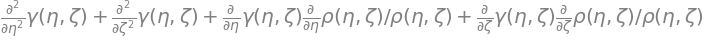

In [29]:
expand((1/rho)*Ric.tensor()[3,3].args[1])

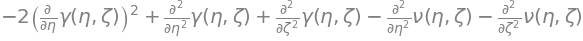

In [36]:
ricciSimplified[0,0].args[1].args[1].args[0]

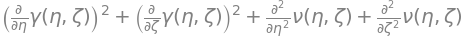

In [39]:
einsteinSimplified[2,2].args[2]